In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [4]:
dftouse=pd.read_csv('newdf.csv')
dftouse.head()

,diffbaron,diffcc,diffcs,diffdmg,diffdrag,diffgold,diffinhib,diffkda,diffrange,diffspree,difftank,diffturr,fbaron,fblood,fdrag,finhib,fturret,win
0,1,819,155,17067,3,17703,2,18.144444,-1,5,0,8,True,False,True,True,False,True
1,1,-685,24,-23447,0,-11396,-2,-20.117208,1,-7,1,-4,True,False,True,False,False,False
2,-1,658,16,-5988,0,-11734,-2,-21.416667,1,-3,1,-6,False,True,True,False,True,False
3,-1,-339,-127,-9102,-2,-17661,-2,-17.531349,1,-6,0,-7,False,False,False,False,False,False
4,0,756,162,12505,0,11899,1,26.059524,0,3,3,5,False,False,False,True,True,True


In [7]:
# load sklearn package 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

In [10]:
# variables for classifiers
col_names = dftouse.columns.values
train_col = np.array([x for x in col_names if x not in
             ['win']])
num_features = np.size(train_col)
print(train_col, )

(array(['diffbaron', 'diffcc', 'diffcs', 'diffdmg', 'diffdrag', 'diffgold',
       'diffinhib', 'diffkda', 'diffrange', 'diffspree', 'difftank',
       'diffturr', 'fbaron', 'fblood', 'fdrag', 'finhib', 'fturret'], 
      dtype='|S9'),)


In [11]:
gnb = GaussianNB()
def quick_score(games_df, col_index):
    gnb.fit(games_df[[col_index]], games_df['win'])
    return gnb.score(games_df[[col_index]], games_df['win'])

scores = [quick_score(dftouse, x) for x in np.arange(num_features-1)]
[x for x in list(zip(train_col, scores))]

[('diffbaron', 0.73703209217227905),
 ('diffcc', 0.57676902536715624),
 ('diffcs', 0.77169559412550071),
 ('diffdmg', 0.8998664886515354),
 ('diffdrag', 0.77594817781733672),
 ('diffgold', 0.97779755723680961),
 ('diffinhib', 0.89230084557187361),
 ('diffkda', 0.94931513623102404),
 ('diffrange', 0.52415566434258021),
 ('diffspree', 0.88933392671710432),
 ('difftank', 0.52291944815309299),
 ('diffturr', 0.96998467091925034),
 ('fbaron', 0.71596696830341688),
 ('fblood', 0.60559758690599808),
 ('fdrag', 0.67937496909459527),
 ('finhib', 0.86223606784354445)]

['diffbaron', 'diffcc', 'diffcs', 'diffdmg', 'diffdrag', 'diffgold', 'diffinhib', 'diffkda', 'diffrange', 'diffspree', 'difftank', 'diffturr', 'fbaron', 'fblood', 'fdrag', 'finhib', 'fturret']


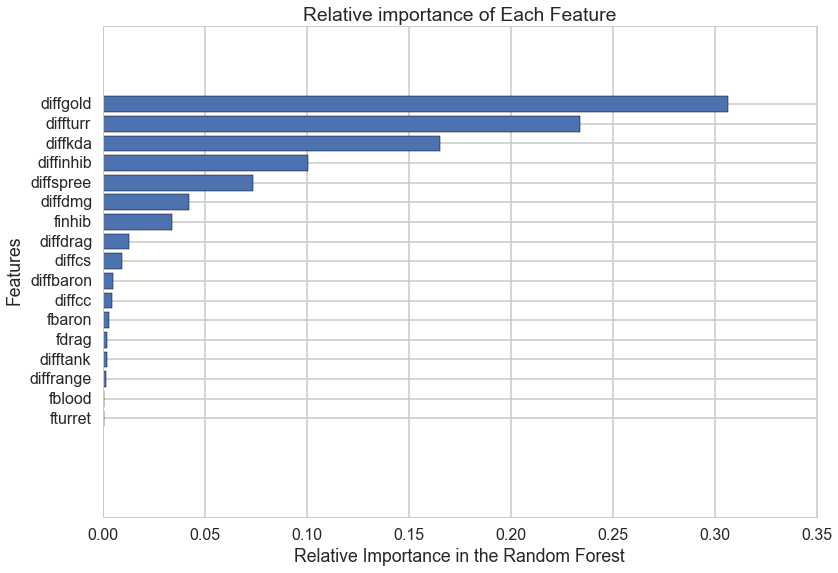

In [14]:
#training columns
x_col = list(dftouse.columns.values)

#removing winner/loser
x_col.remove('win')

#what are the features? 
print x_col

#Creating a large forest so we can better identify important features
clfForest = RandomForestClassifier(n_jobs = 3, n_estimators = 100)
#Fit the classifier
clfForest = clfForest.fit(dftouse[x_col], dftouse["win"])

#importance
importances = clfForest.feature_importances_
importances, x_col = zip(*sorted(zip(importances, x_col)))

#plot importances
plt.barh(range(len(x_col)),importances,align='center')
plt.yticks(range(len(x_col)),x_col)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [15]:
STANDARDIZABLE = list(x_col)

In [16]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(dftouse.shape[0]), train_size=0.7)

mask=np.ones(dftouse.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [17]:
#your code here
#find a matrix of each row of the data that we want to standardize
temp_dftouse = dftouse[STANDARDIZABLE]
train_temp_dftouse = temp_dftouse[mask == 1]
matrix = train_temp_dftouse.values

#use sklearn.preprocessing.StandardScaler to transform both training and test parts of each column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(matrix)
array = scaler.transform(temp_dftouse)
newdf = pd.DataFrame(dict(zip(STANDARDIZABLE,array.transpose())))

#replace old columns with new standardized columns
for colname in STANDARDIZABLE:
    dftouse[colname] = newdf[colname]

In [20]:
lcols = list(dftouse.columns)
lcols.remove('win')
print len(lcols)

17


In [21]:
dftouse.head()

,diffbaron,diffcc,diffcs,diffdmg,diffdrag,diffgold,diffinhib,diffkda,diffrange,diffspree,difftank,diffturr,fbaron,fblood,fdrag,finhib,fturret,win
0,1.011636,0.429249,1.616672,0.823219,1.487629,1.480421,1.121227,0.748495,-0.851383,1.297840,0.000274,1.454695,1.433232,-0.995770,1.133283,1.188966,-1.003680,True
1,1.011636,-0.348307,0.356804,-1.020311,0.116698,-0.833889,-1.080401,-0.726543,0.870726,-1.733672,0.968832,-0.677989,1.433232,-0.995770,1.133283,-0.841067,-1.003680,False
2,-0.867600,0.346013,0.279865,-0.225865,0.116698,-0.860771,-1.080401,-0.776639,0.870726,-0.723168,0.968832,-1.033436,-0.697724,1.004248,1.133283,-0.841067,0.996333,False
3,-0.867600,-0.169428,-1.095412,-0.367563,-0.797256,-1.332159,-1.080401,-0.626855,0.870726,-1.481046,0.000274,-1.211160,-0.697724,-0.995770,-0.882392,-0.841067,-1.003680,False
4,0.072018,0.396678,1.683994,0.615632,0.116698,1.018816,0.570820,1.053632,0.009671,0.792588,2.905948,0.921524,-0.697724,-0.995770,-0.882392,1.188966,0.996333,True


In [22]:
from sklearn.svm import LinearSVC

clfsvm=LinearSVC(loss="hinge")
Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
Xmatrix=dftouse[lcols].values
Yresp=dftouse['win'].values

Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

In [23]:
#your code here
from sklearn.grid_search import GridSearchCV
gs = GridSearchCV(estimator=clfsvm,param_grid={'C':Cs},cv=5).fit(Xmatrix_train,Yresp_train)

print 'best C value:', gs.best_params_
best = gs.best_estimator_
clf = best.fit(Xmatrix_train,Yresp_train)

best C value: {'C': 0.1}


In [24]:
#calculate the accuracy here
#your code here
train_acc = gs.best_score_
train_acc2 = clf.score(Xmatrix_train,Yresp_train)

print 'DEFAULT CLASSIFIER'
print 'accuracy:', train_acc
print ''
print 'BEST CLASSIFIER'
print 'accuracy:', train_acc2

DEFAULT CLASSIFIER
accuracy: 0.988768013563

BEST CLASSIFIER
accuracy: 0.988979937836


In [25]:
#your code here
def cv_optimize(clf, parameters, X, y, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    best = gs.best_estimator_
    return best

In [28]:
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [29]:
clfsvm, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse,lcols, 'win',1, mask=mask)

using mask
############# based on standard predict ################
Accuracy on training data: 0.99
Accuracy on test data:     0.98
[[3113   46]
 [  51 2857]]
########################################################


C:\Users\Andy\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols

In [32]:
dftouse.head()

,diffbaron,diffcc,diffcs,diffdmg,diffdrag,diffgold,diffinhib,diffkda,diffrange,diffspree,difftank,diffturr,fbaron,fblood,fdrag,finhib,fturret,win
0,1.011636,0.429249,1.616672,0.823219,1.487629,1.480421,1.121227,0.748495,-0.851383,1.297840,0.000274,1.454695,1.433232,-0.995770,1.133283,1.188966,-1.003680,True
1,1.011636,-0.348307,0.356804,-1.020311,0.116698,-0.833889,-1.080401,-0.726543,0.870726,-1.733672,0.968832,-0.677989,1.433232,-0.995770,1.133283,-0.841067,-1.003680,False
2,-0.867600,0.346013,0.279865,-0.225865,0.116698,-0.860771,-1.080401,-0.776639,0.870726,-0.723168,0.968832,-1.033436,-0.697724,1.004248,1.133283,-0.841067,0.996333,False
3,-0.867600,-0.169428,-1.095412,-0.367563,-0.797256,-1.332159,-1.080401,-0.626855,0.870726,-1.481046,0.000274,-1.211160,-0.697724,-0.995770,-0.882392,-0.841067,-1.003680,False
4,0.072018,0.396678,1.683994,0.615632,0.116698,1.018816,0.570820,1.053632,0.009671,0.792588,2.905948,0.921524,-0.697724,-0.995770,-0.882392,1.188966,0.996333,True


In [34]:
formula = 'win ~ diffbaron + diffcc + diffcs + diffdmg + diffdrag + diffgold + diffinhib + diffkda + diffrange + diffspree + difftank + diffturr + fbaron + fblood + fdrag + finhib + fturret'
ols_model = ols(formula, dftouse).fit()
ols_model.summary()

ValueError: For numerical factors, num_columns must be an int